<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-64/blob/main/TAREA_SEMANA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esta actividad use la base de datos encontrada por aquí, y su descripción aquí. 

Esta actividad se compone de 2 partes:

Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.
Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 

Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.

In [69]:
import pandas as pd
dfClients=pd.read_csv("/content/default of credit card clients.csv").dropna()

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


In [70]:
dfClientsFeatures=dfClients.rename(columns={"X1":"NT DOLLAR","X2":"GENDER","X3":"EDUATION","X4":"MARITAL STATUS","X5":"AGE","X6":"P SEP 2005","X7":"P AUG 2005","X8":"P JUL 2005","X9":"P JUN 2005","X10":"P MAY 2005","X11":"P APR 2005","X12":"NT SEPT 2005","X13":"NT AUG 2005","X14":"NT JUL 2005","X15":"NT JUN 2005","X16":"NT MAY 2005","X17":"NT APR 2005","X18":"PAY SEP 2005","X19":"PAY AUG 2005","X20":"PAY JUL 2005","X21":"PAY JUN 2005","X22":"PAY MAY 2005","X23":"PAY APR 2005"})

In [71]:
#dfClientsFeatures.describe()
dfClientsFeatures.loc[:,"Y"]

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    0.0
29997    1.0
29998    1.0
29999    1.0
Name: Y, Length: 29958, dtype: float64

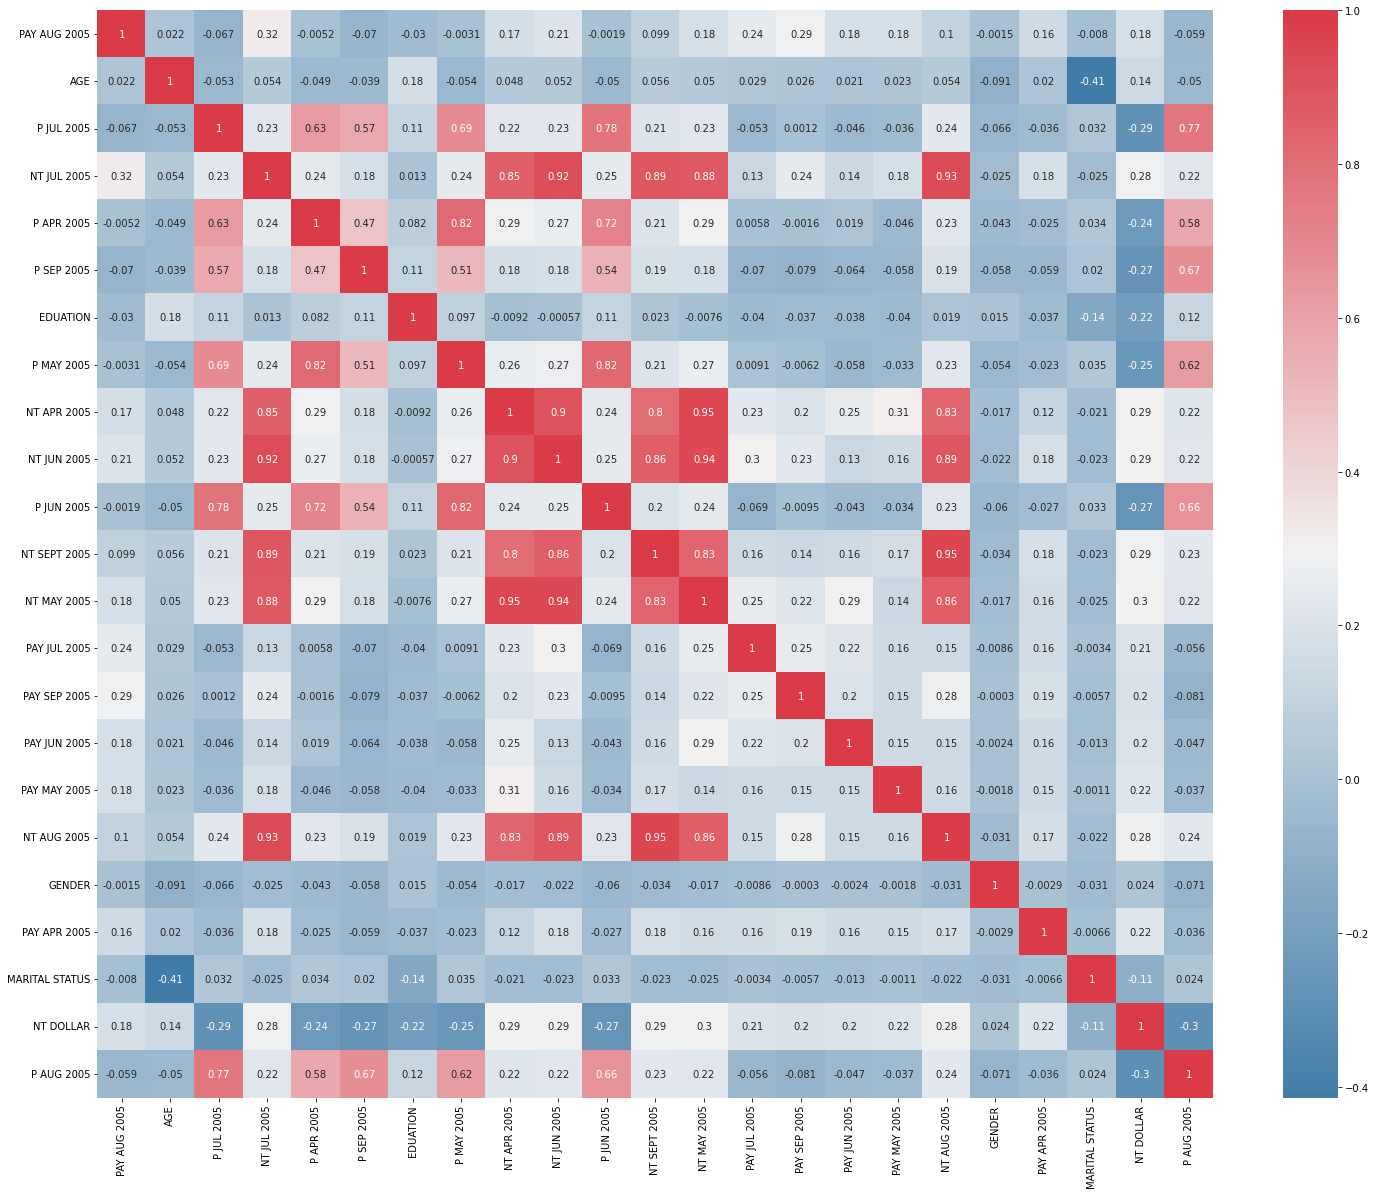

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
featureLabels={"NT DOLLAR","GENDER","EDUATION","MARITAL STATUS","AGE","P SEP 2005","P AUG 2005","P JUL 2005","P JUN 2005","P MAY 2005","P APR 2005","NT SEPT 2005","NT AUG 2005","NT JUL 2005","NT JUN 2005","NT MAY 2005","NT APR 2005","PAY SEP 2005","PAY AUG 2005","PAY JUL 2005","PAY JUN 2005","PAY MAY 2005","PAY APR 2005"}
yValue=pd.Series(dfClientsFeatures.loc[:,"Y"])
dfClientFeatures=pd.DataFrame(dfClientsFeatures,columns=featureLabels)
xValue=dfClientFeatures
fig = plt.figure(figsize=(25, 20))

sns.heatmap(dfClientFeatures.corr(), annot=True,cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True))
#plt.savefig("Heatmap.png")

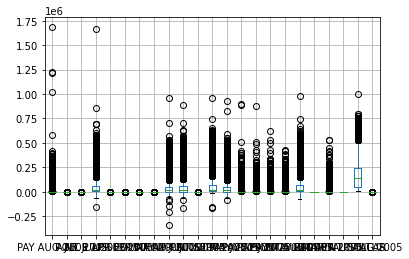

In [109]:
xValue.boxplot()

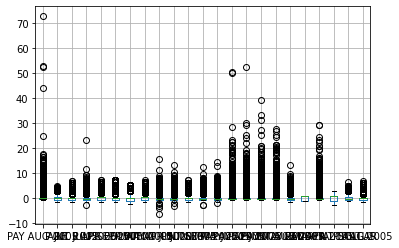

In [115]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)
pd.DataFrame(X_scaled,columns=featureLabels).boxplot()

In [133]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([X_scaled[:,14]])
print(normalized_arr.shape)
print(X_scaled[:,14].shape)


(1, 29958)
(29958,)


In [105]:
yValue

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    0.0
29997    1.0
29998    1.0
29999    1.0
Name: Y, Length: 29958, dtype: float64

Eigenvalues:
[6.5438627  4.09790723 1.55096619 1.47170044 1.02579152 0.95708662
 0.90788395 0.88776016 0.87133244 0.78304073 0.7327996  0.68217331
 0.57097749 0.52461672 0.40368175 0.25979958 0.24919499 0.18882949
 0.13191182 0.07015009 0.04078896 0.02528962 0.02322235]

Variances (Percentage):
[28.45062725 17.81639323  6.74310615  6.39848396  4.45981427  4.16110729
  3.94718978  3.85969795  3.78827545  3.40441128  3.18597888  2.96587193
  2.48242797  2.28086614  1.75507945  1.12952568  1.0834203   0.82097038
  0.57351051  0.30499019  0.17733738  0.10995119  0.10096338]



Text(0, 0.5, 'Explained variance (%)')

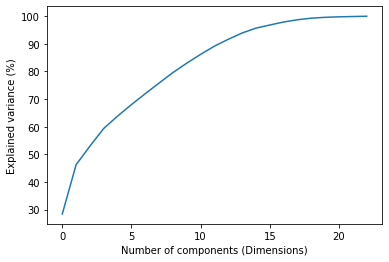

In [149]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Train accuracy: 0.78
Test accuracy: 0.78

Test confusion_matrix


Text(33.0, 0.5, 'True')

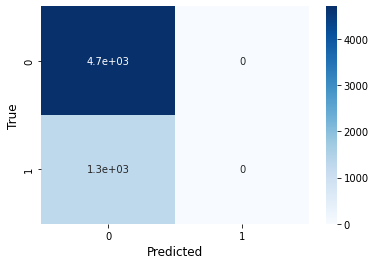

In [103]:
# Define Feature matrix ad Target vector
from sklearn.preprocessing import StandardScaler
X = (xValue)


# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

Train accuracy: 0.81
Test accuracy: 0.81

Test confusion_matrix


Text(33.0, 0.5, 'True')

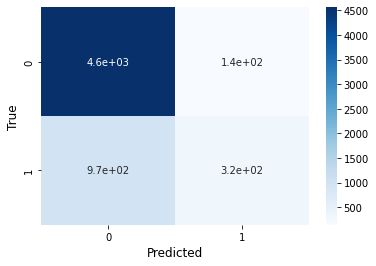

In [134]:
# Define Feature matrix ad Target vector
from sklearn.preprocessing import StandardScaler
X = sc.fit_transform(xValue)


# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [76]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 28.45062725,  46.26702049,  53.01012664,  59.4086106 ,
        63.86842487,  68.02953216,  71.97672194,  75.83641989,
        79.62469534,  83.02910662,  86.21508551,  89.18095743,
        91.6633854 ,  93.94425154,  95.69933099,  96.82885667,
        97.91227697,  98.73324735,  99.30675786,  99.61174805,
        99.78908543,  99.89903662, 100.        ])

GENDER            0.883357
PAY JUL 2005      0.784894
PAY SEP 2005      0.728411
PAY MAY 2005      0.702689
MARITAL STATUS    0.666526
PAY JUN 2005      0.645232
P SEP 2005        0.623610
PAY AUG 2005      0.596920
PAY APR 2005      0.596139
AGE               0.577125
EDUATION          0.563608
P APR 2005        0.400774
P AUG 2005        0.376411
NT DOLLAR         0.375095
P MAY 2005        0.358645
NT JUN 2005       0.353848
NT MAY 2005       0.351716
NT JUL 2005       0.349744
NT AUG 2005       0.345767
P JUN 2005        0.344508
NT APR 2005       0.344477
P JUL 2005        0.343802
NT SEPT 2005      0.334369
dtype: float64

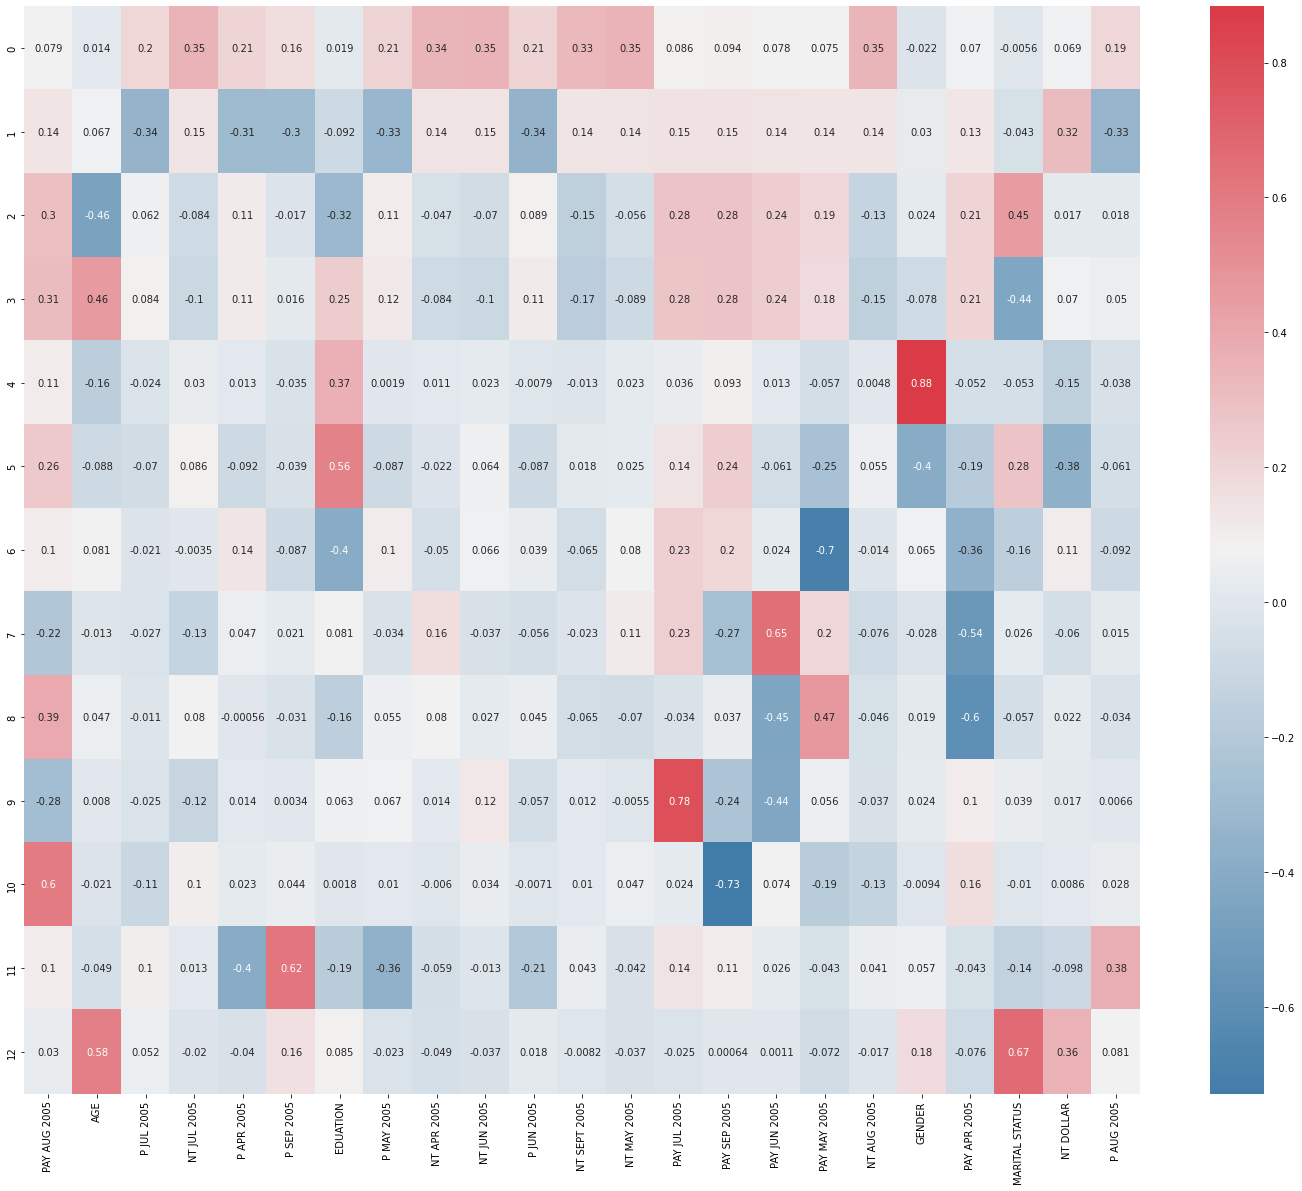

In [197]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)

from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(xValue),columns = xValue.columns) 

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(data_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
#print(X_pca.head())
#print("\nSize: ")
#print(X_pca.shape)
#pd.DataFrame(pca.components_,columns=data_scaled.columns)
#print(pd.DataFrame(pca.components_,columns=xValue.columns))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fig = plt.figure(figsize=(25, 20))
cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True)
sns.heatmap(pd.DataFrame(pca.components_,columns=data_scaled.columns), annot=True,cmap=cmap)
values=(pd.DataFrame(pca.components_,columns=data_scaled.columns).abs().max().sort_values(ascending = False))
(values)

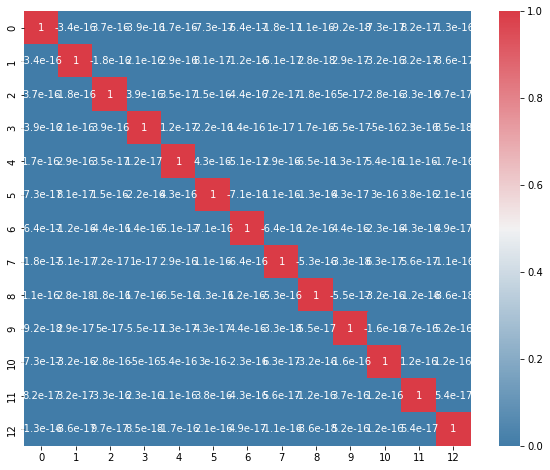

In [182]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True,cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True))

Train accuracy: 0.8
Test accuracy: 0.81

Test confusion_matrix


Text(33.0, 0.5, 'True')

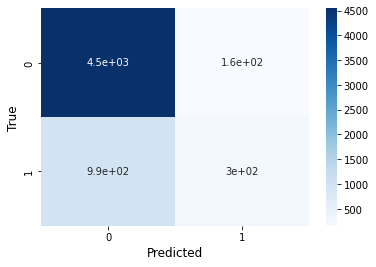

In [183]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, yValue, test_size=0.20, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


Threshold Distance:  -0.31087642571864893
Train accuracy: 0.92
Test accuracy: 0.77

Test confusion_matrix


Text(33.0, 0.5, 'True')

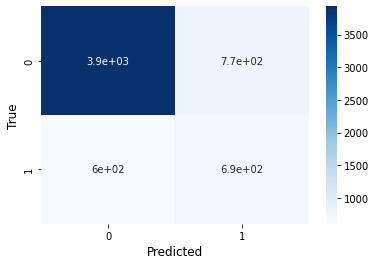

In [144]:
weight_vector = list(clf.coef_[0])
dist = np.dot(X_train_pca, weight_vector)
y_dist = dist*[-1 if x==0 else 1 for x in list(y_train)]
val = np.percentile(y_dist, 20)
print("Threshold Distance: ", val)
y_train[(y_dist < val)].value_counts()
X_train_new = X_train_pca[(~(y_dist < val))]
y_train_new = y_train[(~(y_dist < val))]

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_new, y_train_new)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train_new, 
                                                 clf.predict(X_train_new)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [147]:
print(X_train_new.shape)
print(X_train_pca.shape)

(19173, 15)
(23966, 15)


1. ¿Cuál es el número de componentes mínimo y por qué?

Los PCA son 12 , dado que la suma acumulada de la varianza acumulada representa el 90%
2. ¿Cuál es la variación de los datos  que representan esos componentes?

90%
4. ¿Cuál es la pérdida de información después de realizar PCA?

No se puede interpretar de forma directa las características que influyen en el modelo
5. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Género tiene mayor importancia y la facturación de septiembre de 2005 tiene la menor importancia

6. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Para reducir la colinealidad de los modelos puede ayudar a normalizar y a obtener mejores resultados en este caso se logró incrementar la efectividad del modelo en un 4%.
